# 基本线性模型——线性回归
线性回归，也称为普通最小二乘法(OLS)，是回归分析中最简单也最经典的线性模型

## 线性回归的基本原理
找到训练数据集中$y$的预测值和真实值的平方差最小的时候，所对应的$w$和$b$。
线性回归没有可供调节的参数，这是优势，也代表我们无法控制其复杂性。

In [123]:
%matplotlib inline
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# 生成数据集
X, y = make_regression(n_samples=400,n_features=2,n_informative=2,random_state=38)
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)

In [124]:
print("lr.coef_: {}".format(lr.coef_[:]))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [26.74550564 15.25568148]
lr.intercept_: 6.661338147750939e-16


## 线性回归的性能表现

In [125]:
# 性能表现
print("训练数据集得分: {:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分: {:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分: 1.00
测试数据集得分: 1.00


In [26]:
# 添加噪音之后的性能表现
X, y = make_regression(n_samples=400,n_features=2,n_informative=2,noise=50,random_state=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)
print("训练数据集得分: {:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分: {:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分: 0.89
测试数据集得分: 0.85


In [126]:
# 载入糖尿病数据集
from sklearn.datasets import load_diabetes
X, y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)
lr = LinearRegression().fit(X_train, y_train)
display(pd.DataFrame(X))
display(pd.DataFrame(y))

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [32]:
print("训练数据集得分：{:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分：0.53
测试数据集得分：0.46


**[结果分析]** 真实数据非常复杂，线性回归表现会大幅下降。

线性回归容易出现过拟合，测试集得分和训练集得分差异巨大是过拟合的信号之一，因此我们需要一个能够控制模型复杂度的模型

# 使用L2正则化的线性模型——岭回归
岭回归是回归分析中的常用线性模型，它实际是一种改良的最小二乘法。
## 岭回归原理
岭回归能在一定程度上避免过拟合。在岭回归中，模型会保留所有的特征变量，但会减小特征变量的系数值，让特征变量对结果的影响变小，在岭回归中通过*alpha*参数来控制减小特征变量系数的程度。而这种通过保留全部特征变量，只是降低特征变量系数值来避免过拟合的方法，我们称之为L2正则化。

In [129]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train, y_train) # alpha默认为1
print("训练数据集得分：{:.2f}".format(ridge.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(ridge.score(X_test, y_test)))

训练数据集得分：0.52
测试数据集得分：0.47


**[结果分析]** 训练数据集和测试数据集得分都变低了，但是得分却一致了。

复杂度越低的模型，其在训练集上的表现就越差，但其泛化的能力就会更好。

In [36]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("训练数据集得分：{:.2f}".format(ridge10.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(ridge10.score(X_test, y_test)))

训练数据集得分：0.15
测试数据集得分：0.16


- [注意]：alpha的设定主要根据经验。增加alpha值会降低特征变量系数，使其趋近于0，从而降低在训练集上的性能，有助于泛化。

In [127]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("训练数据得分：{:.2f}".format(ridge01.score(X_train, y_train)))
print("测试数据的分：{:.2f}".format(ridge01.score(X_test, y_test)))

训练数据得分：0.52
测试数据的分：0.47


**[结果分析]** 一个更小的alpha让模型更加接近线性回归

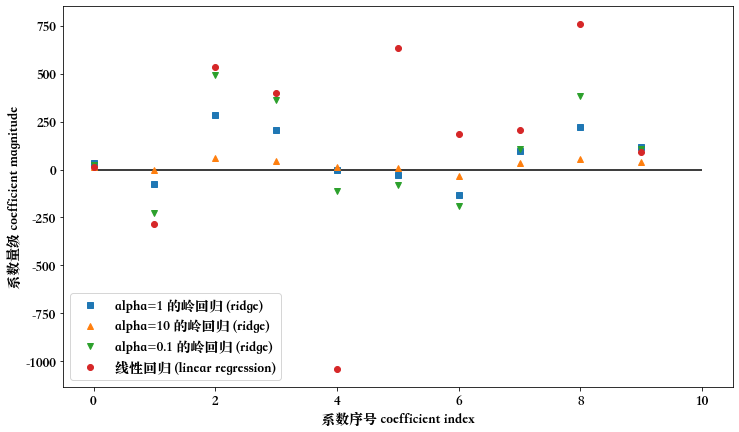

In [110]:
from matplotlib.font_manager import FontProperties
# windows下配置 font 为中文字体，自己去该路径找到自己电脑自带的字体
# myfont = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
# mac下配置 font 为中文字体，自己找到自己电脑自带的字体
myfont = FontProperties(fname="/System/Library/Fonts/Supplemental/Songti.ttc")
plt.rcParams['font.sans-serif'] = [myfont.get_name()]  # 中文字体设置-宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(12,7))
plt.plot(ridge.coef_, 's', label = 'alpha=1 的岭回归 (ridge)')
plt.plot(ridge10.coef_, '^', label = 'alpha=10 的岭回归 (ridge)')
plt.plot(ridge01.coef_, 'v', label = 'alpha=0.1 的岭回归 (ridge)')
plt.plot(lr.coef_, 'o', label = '线性回归 (linear regression)')
plt.xlabel("系数序号 coefficient index", fontsize=14)
plt.ylabel("系数量级 coefficient magnitude", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(0,0, len(lr.coef_))
plt.legend(loc='best', fontsize=14)
plt.show()

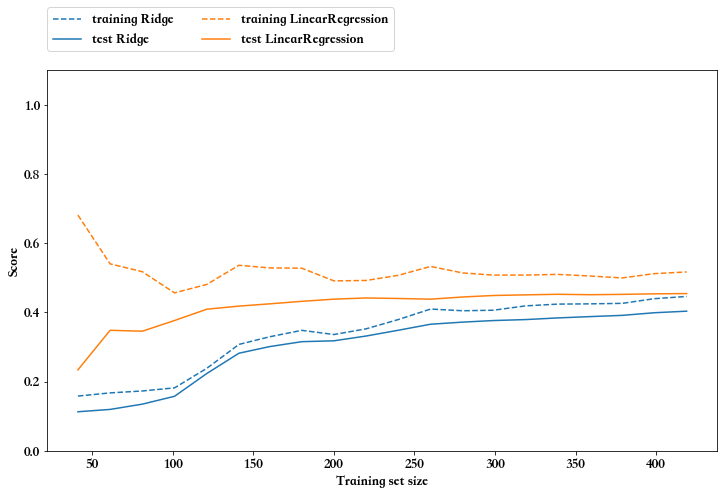

In [70]:
from sklearn.model_selection import learning_curve,KFold
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, 
                                                                random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name )
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(0, 1.1)
plt.figure(figsize=(12,7))
plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=14)
plt.show()

**[结果分析]** 训练集比测试集得分高。数据集越来越大，模型表现越来越好。如果数据最够多，正则化就不那么重要了，两个模型表现相差无几。

# 使用L1正则化的线性模型——套索回归
另一个对线性回归进行正则化的模型，套索回归（lasso）
## 套索回归的原理
在限制系数的时候，将一部分特征变量的系数设置为0，称之为L1正则化。也就是有一部分特征变量会被彻底忽略，这让模型更容易理解，并且突出体现模型中最重要的特征。

In [71]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("套索回归在训练数据集的得分：{:.2f}".format(lasso.score(X_train, y_train)))
print("套索回归在测试数据集的得分：{:.2f}".format(lasso.score(X_test, y_test)))
print("套索回归使用的特征数：{}".format(np.sum(lasso.coef_ != 0)))

套索回归在训练数据集的得分：0.36
套索回归在测试数据集的得分：0.37
套索回归使用的特征数：3


**[结果分析]** 训练集和测试集的得分都很差，意味着模型发生了欠拟合。10个特征只用了3个。
## 套索回归的参数调节

In [73]:
#增加最大迭代次数的默认设置
#否则模型会提示我们增加最大迭代次数
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("alpha=0.1时套索回归在训练数据集的得分：{:.2f}".format(lasso01.score(X_train, y_train)))
print("alpha=0.1时套索回归在测试数据集的得分：{:.2f}".format(lasso01.score(X_test, y_test)))
print("alpha=0.1时套索回归使用的特征数：{}".format(np.sum(lasso01.coef_ != 0)))

alpha=0.1时套索回归在训练数据集的得分：0.52
alpha=0.1时套索回归在测试数据集的得分：0.48
alpha=0.1时套索回归使用的特征数：7


**[结果分析]** 降低alpha值可以拟合出更复杂的模型，获得更好的表现。这里比岭回归还要好一些，而且只用了七个特征。

但是，如果alpha太低，相当于去除了正则化，就会跟线性模型接近，出现过拟合问题。

In [130]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("alpha=0.0001时套索回归在训练数据集的得分：{:.2f}".format(lasso00001.score(X_train, y_train)))
print("alpha=0.0001时套索回归在测试数据集的得分：{:.2f}".format(lasso00001.score(X_test, y_test)))
print("alpha=0.0001时套索回归使用的特征数：{}".format(np.sum(lasso00001.coef_ != 0)))

alpha=0.0001时套索回归在训练数据集的得分：0.53
alpha=0.0001时套索回归在测试数据集的得分：0.46
alpha=0.0001时套索回归使用的特征数：10


## 套索回归和岭回归的对比

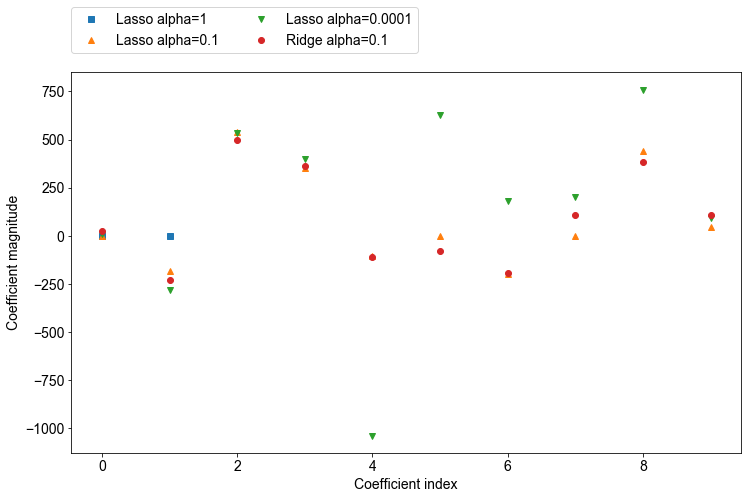

In [131]:
plt.figure(figsize=(12,7))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.1")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Coefficient index", fontsize=14)
plt.ylabel("Coefficient magnitude", fontsize=14)
plt.show()

#  其他常用模型
## 弹性网模型（Elastic Net）
综合了套索回归和岭回归的惩罚因子。实践中这两个模型组合效果是最好的，但是代价是要调整两个参数。

In [108]:
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet(alpha=0.1,l1_ratio=0.7).fit(X_train, y_train)
print("弹性网模型在训练数据集的得分：{:.2f}".format(ElasticNet.score(X_train, y_train)))
print("弹性网模型在测试数据集的得分：{:.2f}".format(ElasticNet.score(X_test, y_test)))

弹性网模型在训练数据集的得分：0.70
弹性网模型在测试数据集的得分：0.63


Optimal regularization parameter : 0.00013141473626117567


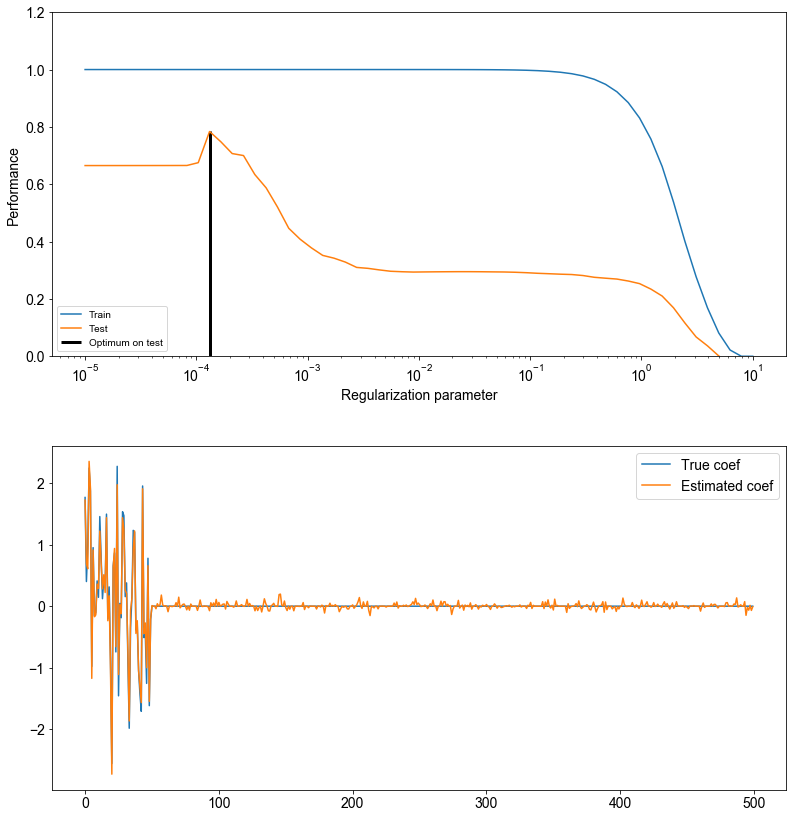

In [120]:
import numpy as np
from sklearn import linear_model
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname="/System/Library/Fonts/Supplemental/Arial.ttf")
plt.rcParams['font.sans-serif'] = [myfont.get_name()]
plt.rcParams['axes.unicode_minus'] = True  

###############################################################################
# Generate sample data
n_samples_train, n_samples_test, n_features = 75, 150, 500
np.random.seed(0)
coef = np.random.randn(n_features)
coef[50:] = 0.0  # only the top 10 features are impacting the model
X = np.random.randn(n_samples_train + n_samples_test, n_features)
y = np.dot(X, coef)
 
# Split train and test data
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
 
###############################################################################
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=100000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))
i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)
 
# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_
 
###############################################################################
# Plot results functions
 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

## 逻辑斯蒂回归（Logistic Regression）和线性支持向量机（Linear SVC）

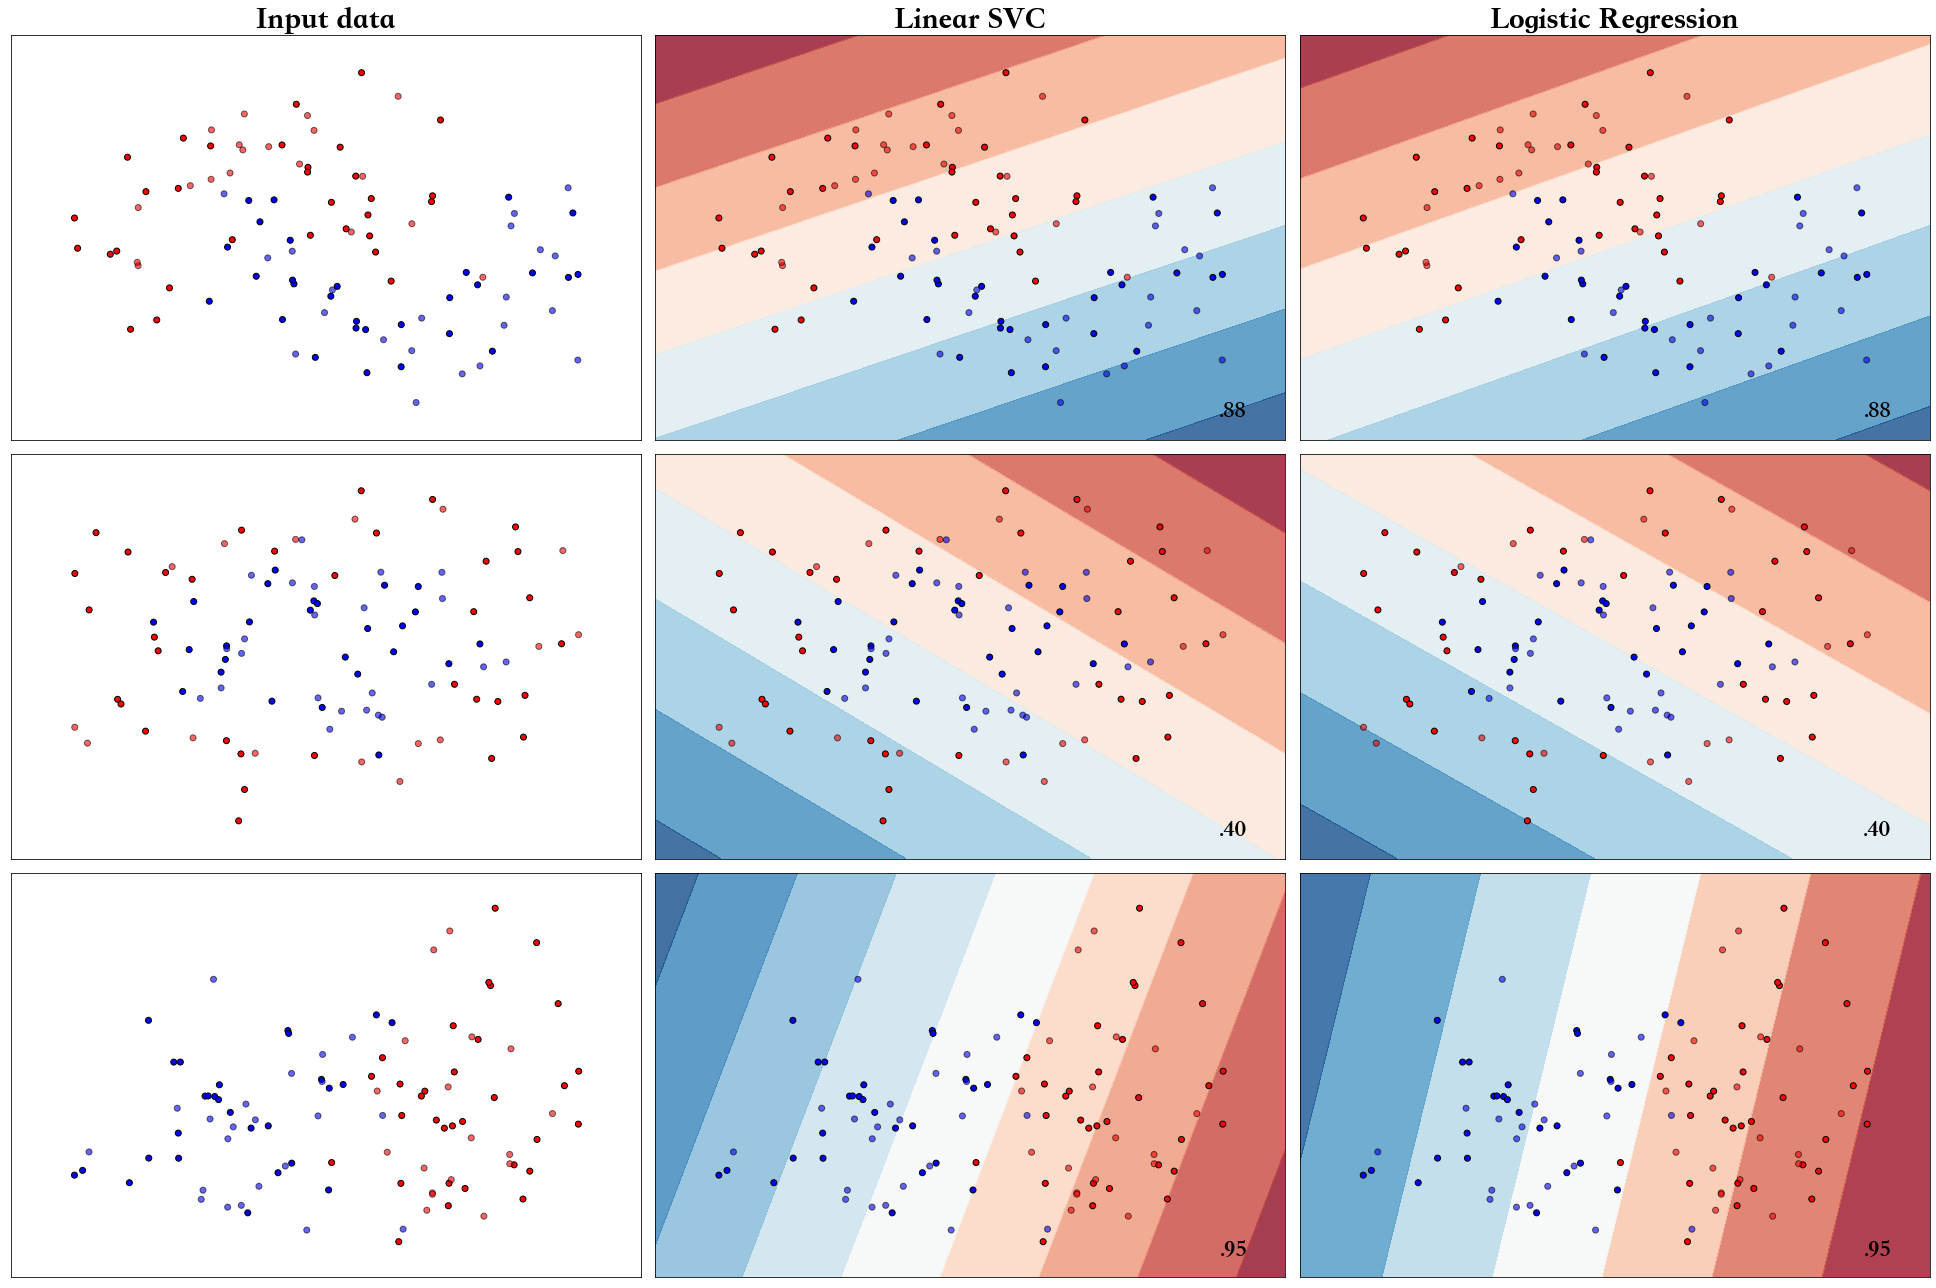

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

names = [ "Linear SVC", "Logistic Regression"]

classifiers = [
   LinearSVC(),
LogisticRegression(solver='liblinear')]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(27, 18))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", fontsize=32)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize=32)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right', fontsize=24)
        i += 1

plt.tight_layout()
plt.show()